# Why PCA ?

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_utils import PCA, StandardScaler, KMeansClustering, object_from_json_url

### Get Data

In [3]:
PENGUIN_URL = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/refs/heads/main/datasets/json/penguins.json"
penguin_data = object_from_json_url(PENGUIN_URL)

penguins_df = pd.DataFrame.from_records(penguin_data)
penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1
329,Chinstrap,43.5,18.1,202.0,3400.0,0
330,Chinstrap,49.6,18.2,193.0,3775.0,1
331,Chinstrap,50.8,19.0,210.0,4100.0,1


### Penguin Example

Explore the penguin data.

Let's encode the species column into integers.
It's a simple encoding, so we can just do it manually using a function and the `DataFrame.apply()` command.

In [4]:
species = list(penguins_df["species"].unique())

def species_to_label(s):
  return species.index(s)

penguins_df["label"] = penguins_df["species"].apply(species_to_label)

display(penguins_df)
penguins_df.shape

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0
4,Adelie,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1,2
329,Chinstrap,43.5,18.1,202.0,3400.0,0,2
330,Chinstrap,49.6,18.2,193.0,3775.0,1,2
331,Chinstrap,50.8,19.0,210.0,4100.0,1,2


(333, 7)

### Scale

In [5]:
# TODO: Scale data
scaler = StandardScaler()
scaled_penguins_df = scaler.fit_transform(penguins_df.drop(columns=["species", "label"]))
scaled_penguins_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,0.991031
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,0.991031
329,-0.090248,0.475587,0.073816,-1.003795,-1.009050
330,1.026876,0.526444,-0.569284,-0.537380,0.991031
331,1.246638,0.933305,0.645461,-0.133155,0.991031


### Covariances

If we're trying to get some insight into our data, we can look at covariance tables and some plots.

Now that we have scaled data we can look at covariance tables.

In [6]:
# TODO: Look at covariances
cov_matrix = pd.DataFrame(scaled_penguins_df).cov()
cov_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,1.003012,-0.229314,0.655063,0.591227,0.345114
bill_depth_mm,-0.229314,1.003012,-0.579532,-0.473437,0.373796
flipper_length_mm,0.655063,-0.579532,1.003012,0.875608,0.255937
body_mass_g,0.591227,-0.473437,0.875608,1.003012,0.426267
sex,0.345114,0.373796,0.255937,0.426267,1.003012


In [8]:
# Get 2 or 3 most related features with idxmax()
p_cov = scaled_penguins_df.cov()
p_cov[p_cov == p_cov.max(axis=1)] = 0

display(p_cov)
p_cov.abs().idxmax()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,0.000000,-0.229314,0.655063,0.591227,0.345114
bill_depth_mm,-0.229314,0.000000,-0.579532,-0.473437,0.373796
flipper_length_mm,0.655063,-0.579532,0.000000,0.875608,0.255937
body_mass_g,0.591227,-0.473437,0.875608,0.000000,0.426267
sex,0.345114,0.373796,0.255937,0.426267,0.000000


bill_length_mm       flipper_length_mm
bill_depth_mm        flipper_length_mm
flipper_length_mm          body_mass_g
body_mass_g          flipper_length_mm
sex                        body_mass_g
dtype: object

### Separate Features

In [13]:
# TODO: Separate features from the scaled full DataFrame
X = scaled_penguins_df
y = penguins_df["label"]
X.shape, y.shape

((333, 5), (333,))

### Plot the Data

We can look at plots of the most correlated features, and of all of the possible pairs of features.

TOP FEATURES
ALL FEATURES


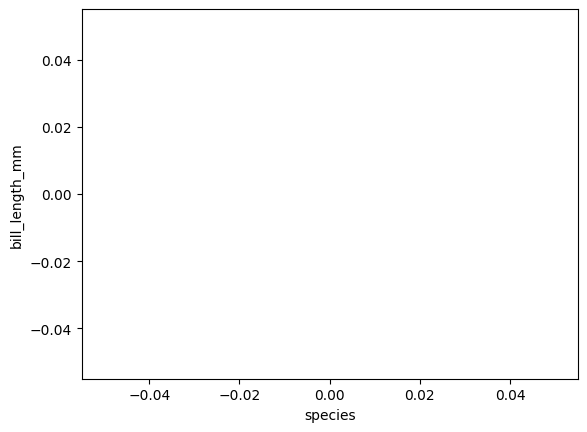

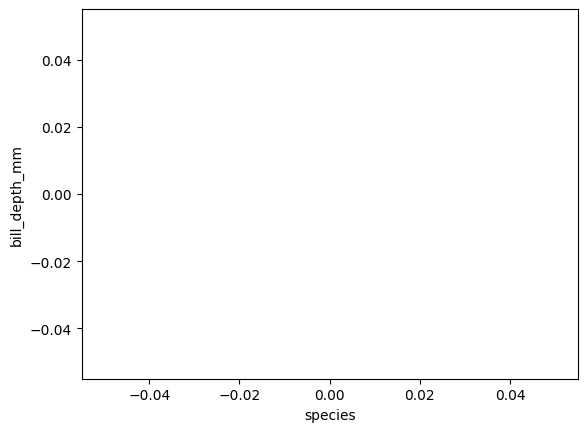

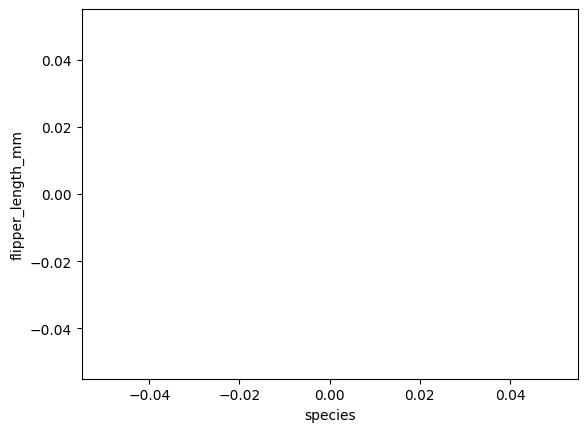

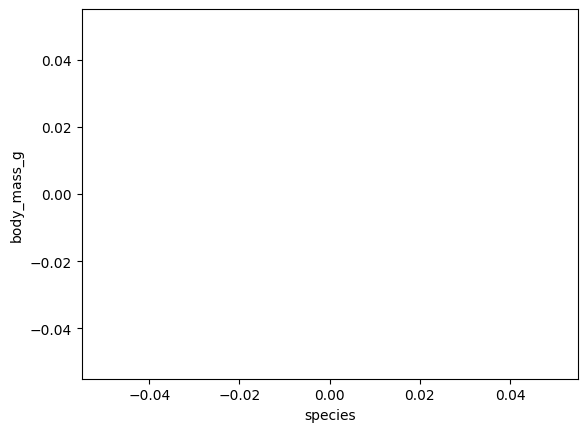

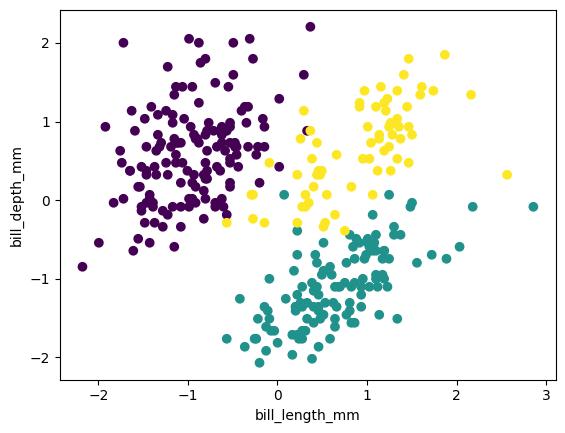

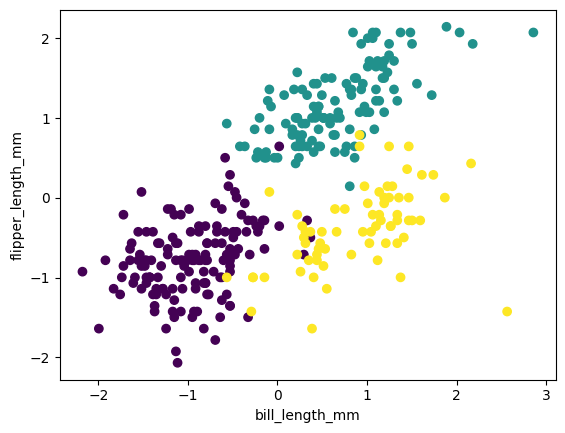

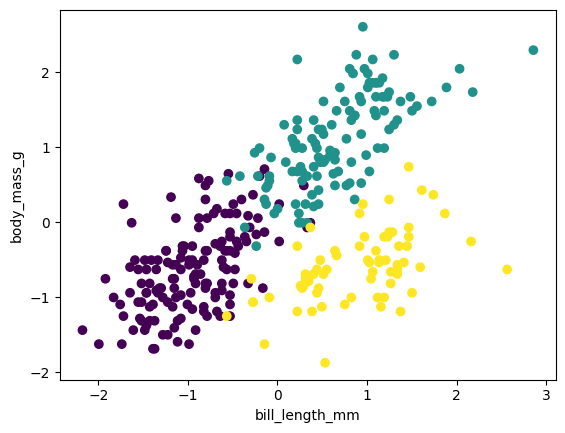

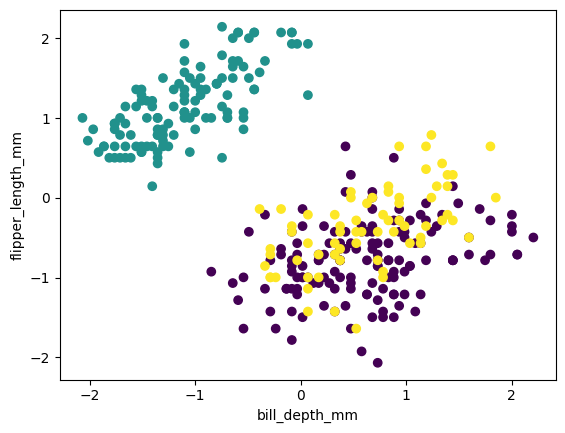

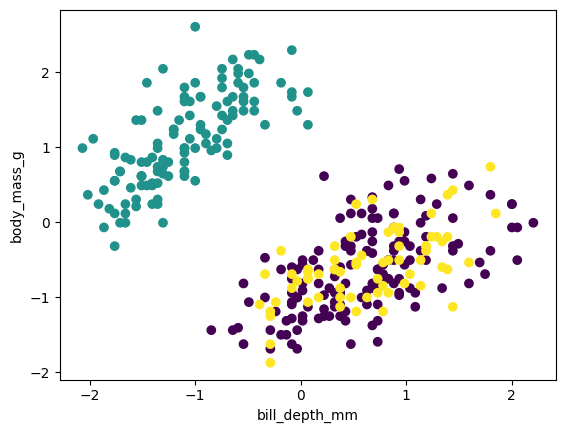

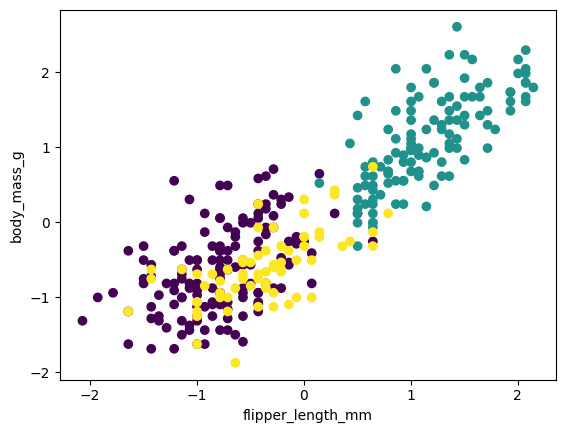

In [14]:
print("TOP FEATURES")
# TOP CORRELATED FEATURES

# TODO: Add the 2 most correlated features here
top_features = []

for i,cx in enumerate(top_features):
  for j,cy in enumerate(top_features):
    if j > i:
      plt.scatter(scaled_penguins_df[cx], scaled_penguins_df[cy], c=penguins_df["label"])
      plt.xlabel(cx)
      plt.ylabel(cy)
      plt.show()

print("ALL FEATURES")
# ALL FEATURES
for i,cx in enumerate(scaled_penguins_df.columns):
  for j,cy in enumerate(scaled_penguins_df.columns):
    if j > i:
      plt.scatter(scaled_penguins_df[cx], scaled_penguins_df[cy], c=penguins_df["label"])
      plt.xlabel(cx)
      plt.ylabel(cy)
      plt.show()

### PCA

The plots tell us a lot, but information is spread through many images.

The top-correlated features actually make it hard to see the separation between $2$ of the species of penguins.

We can try to simplify how we visualize this data by performing `PCA` and combining some of the original features into _principal components_.

In [ ]:
# TODO: create PCA with 3 components
pca = PCA(n_components=3)

# TODO: fit+transform
X_pca = pca.fit_transform(X)
print(X_pca.shape)

# TODO: look at explained variance
pca.explained_variance()

IndexError: list index out of range

### Covariances Again

Can look at covariance table of the `PCA` data.

In [16]:
# TODO: Look at covariance of PCA data
cov_matrix_pca = pd.DataFrame(X_pca).cov()
cov_matrix_pca

NameError: name 'X_pca' is not defined

Hmmm... the covariances of the `PCA` data look strange...

But, that's actually what's expected.

`PCA` separates our data into new features that are combinations of the previous features, but that are themselves not related to each other.

### Plots

In [18]:
pca_column_names = penguins_pca_df.columns

# First 2 PCs
plt.scatter(penguins_pca_df[pca_column_names[0]], penguins_pca_df[pca_column_names[1]], c=penguins_df["label"])
plt.xlabel(pca_column_names[0])
plt.ylabel(pca_column_names[1])
plt.title("2 PCs")
plt.show()

# First 3 PCs
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(penguins_pca_df[pca_column_names[0]],
           penguins_pca_df[pca_column_names[1]],
           penguins_pca_df[pca_column_names[2]],
           c=penguins_df["label"])
ax.set_xlabel(pca_column_names[0])
ax.set_ylabel(pca_column_names[1])
ax.set_zlabel(pca_column_names[2])
ax.set_title("3 PCs")
plt.show()

NameError: name 'penguins_pca_df' is not defined

Although it has combined some of the features, we can still see a lot of information from our original data.

### Clustering

I wonder what clustering would do...

In [19]:
penguin_clusterer = KMeansClustering(n_clusters=6)
penguin_clusters = penguin_clusterer.fit_predict(penguins_pca_df)

NameError: name 'penguins_pca_df' is not defined

In [ ]:
# First 3 PCs
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(penguins_pca_df[pca_column_names[0]],
           penguins_pca_df[pca_column_names[1]],
           penguins_pca_df[pca_column_names[2]],
           c=penguin_clusters["clusters"])
ax.set_xlabel(pca_column_names[0])
ax.set_ylabel(pca_column_names[1])
ax.set_zlabel(pca_column_names[2])
ax.set_title("3 PCs")
plt.show()